In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the data, keeping only 10,000 of the most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 [==============================] - 2s 0us/step


In [3]:
train_data[:2]


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
# Check the first label
train_labels[0]


1

In [6]:
# Here is a list of maximum indexes in every review --- we search the maximum index
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [7]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [11]:
# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "St
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [12]:
len(reverse_word_index)

88584

In [14]:
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix
 for i,sequence in enumerate(sequences):
     results[i,sequence] = 1 # Sets specific indices of r
 return results

In [15]:
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [16]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
X_train.shape


(25000, 10000)

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(
 optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss = losses.binary_crossentropy,
 metrics = [metrics.binary_accuracy]
)

In [21]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(
 partial_X_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(X_val, y_val)
)


Epoch 1/20


30/30 [==============================] - 14s 172ms/step - loss: 0.5594 - binary_accuracy: 0.7646 - val_loss: 0.4254 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3483 - binary_accuracy: 0.8880 - val_loss: 0.3712 - val_binary_accuracy: 0.8461
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2622 - binary_accuracy: 0.9139 - val_loss: 0.2887 - val_binary_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2072 - binary_accuracy: 0.9299 - val_loss: 0.2781 - val_binary_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1711 - binary_accuracy: 0.9423 - val_loss: 0.2760 - val_binary_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1449 - binary_accuracy: 0.9521 - val_loss: 0.2878 - val_binary_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 22ms/step -

In [23]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

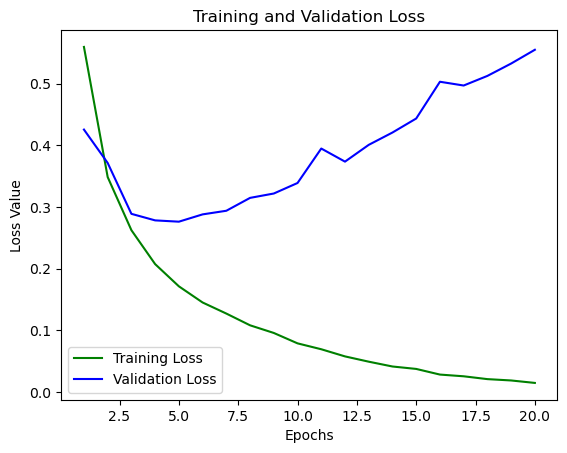

In [25]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

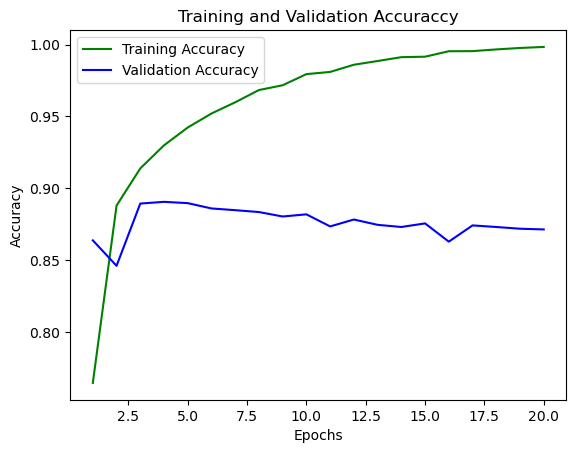

In [26]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:

model.fit(
 partial_X_train,
 partial_y_train,
 epochs=3,
 batch_size=512,
 validation_data=(X_val, y_val)
)

Epoch 1/3
30/30 [==============================] - 8s 273ms/step - loss: 0.0124 - binary_accuracy: 0.9990 - val_loss: 0.5793 - val_binary_accuracy: 0.8701
Epoch 2/3
30/30 [==============================] - 1s 22ms/step - loss: 0.0096 - binary_accuracy: 0.9995 - val_loss: 0.6094 - val_binary_accuracy: 0.8715
Epoch 3/3
30/30 [==============================] - 1s 24ms/step - loss: 0.0104 - binary_accuracy: 0.9985 - val_loss: 0.6282 - val_binary_accuracy: 0.8699


In [28]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 15s 3ms/step


In [29]:
result

array([[0.00835288],
       [1.        ],
       [0.935485  ],
       ...,
       [0.00097328],
       [0.01034784],
       [0.9734569 ]], dtype=float32)

In [30]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
 y_pred[i] = np.round(score)


In [31]:
mae = metrics.mean_absolute_error(y_pred, y_test)


In [32]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.1428>